## Problem Statement

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

### Importing Libraries

In [1]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data
df=pd.read_csv('Review_Prediction.csv')

In [3]:
df.head() # to display top 5 rows from dataset

,Ratings,Full Review
0,5,It's very good to this price.....I really than...
1,5,Performance are too good and friendly budget a...
2,5,Seriously awwsm .. pls go for it without any h...
3,4,I am happy with this laptop. Good for basic us...
4,5,I have just received the laptop today and am v...


#### Dataset description

1. Ratings: It is the Label column, which includes ratings in the form of integers from 1 to 5.
    
2. Full_review: It contains text data on the basis of which we have to build a model to predict ratings.

In [4]:
print('Total no of rows & columns: ',df.shape) # to check number of rows & columns

Total no of rows & columns:  (24557, 2)


In [5]:
print('List of columns: ',df.columns) # to display all the columns name in the dataset

List of columns:  Index(['Ratings', 'Full Review'], dtype='object')


In [6]:
df.info() # to know datatype of each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24557 entries, 0 to 24556
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      24557 non-null  int64 
 1   Full Review  24557 non-null  object
dtypes: int64(1), object(1)
memory usage: 383.8+ KB


In [7]:
# to count number of unique values in each columns 
df.nunique()

Ratings            5
Full Review    15313
dtype: int64

In [8]:
# to get high understanding of dataset or to get overview/stats of the dataset
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Ratings,24557.0,3.991611,1.4039,1.0,3.0,5.0,5.0,5.0


In [9]:
df.isnull().sum()  # to check null values

Ratings        0
Full Review    0
dtype: int64

#### No null values in the dataset

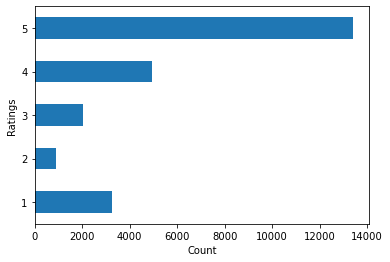

In [10]:
df.groupby('Ratings')['Ratings'].count().plot(kind='barh')
plt.xlabel('Count')
plt.show()

#### From above plot we can say that the dataset is imbalanced

In [11]:
df['length']=df['Full Review'].str.len() #length of Full_review Column.
df.head()

,Ratings,Full Review,length
0,5,It's very good to this price.....I really than...,127
1,5,Performance are too good and friendly budget a...,163
2,5,Seriously awwsm .. pls go for it without any h...,258
3,4,I am happy with this laptop. Good for basic us...,197
4,5,I have just received the laptop today and am v...,247


In [12]:
import re

import nltk
nltk.download('stopwords')

# download words from wordnet library
nltk.download('wordnet')
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nitish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nitish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [14]:
# defining function text cleaner to use on full review column
# Convert all comments text into lower case
# removing punctuation from full review column
# removing stopwords from full review column
# let's remove digits from the full review column
# Using Lemmatizing for converting words to its base form

def text_cleaner(text):
    clean_text = re.sub(r'@[A-Za-z0-9]+','',text)
    clean_text = re.sub('#','',clean_text)
    clean_text = re.sub(r"'s\b",'',clean_text)
    clean_text = re.sub(r'[%$#@&}{]','',clean_text)
    clean_text = re.sub(r'[.,:;!]','',clean_text)
    letters_only = re.sub("[^a-zA-Z]",' ',clean_text)
    
    lower_case = letters_only.lower()
    tokens = [w for w in lower_case.split() if not w in stop_words]
    clean_text=''
    for i in tokens:
        clean_text = clean_text + lemmatizer.lemmatize(i)+ ' '
    return clean_text.strip()

In [15]:
cleaned_text=[]
for i in df['Full Review']:
    cleaned_text.append(text_cleaner(i))

In [16]:
df['Cleaned_Full Reviews'] = cleaned_text

In [17]:
# dropping original column
df=df.drop(columns='Full Review')

In [18]:
df.head()

,Ratings,length,Cleaned_Full Reviews
0,5,127,good pricei really thankful flipkart good expe...
1,5,163,performance good friendly budget also love buy...
2,5,258,seriously awwsm pls go without hesitation perf...
3,4,197,happy laptop good basic use home good kid use ...
4,5,247,received laptop today excited use itmust say p...


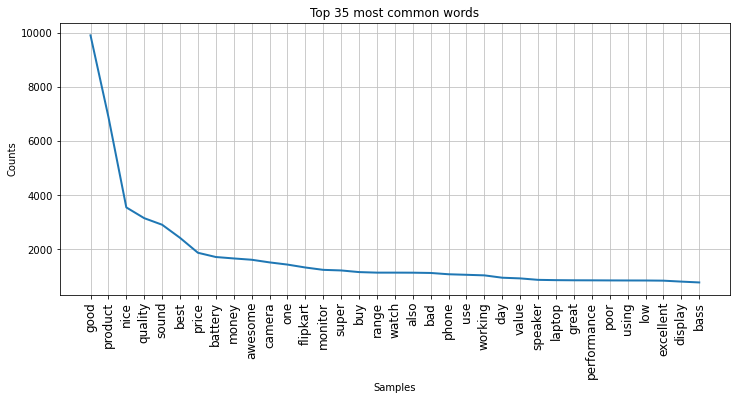

<AxesSubplot:title={'center':'Top 35 most common words'}, xlabel='Samples', ylabel='Counts'>

In [19]:
all_words = []
for line in list(df['Cleaned_Full Reviews']):
    words = line.split()
    for word in words:
        all_words.append(word)
plt.figure(figsize =(12,5))
plt.title('Top 35 most common words')
plt.xticks(fontsize = 12, rotation =90)
fd = nltk.FreqDist(all_words)
fd.plot(35, cumulative=False)

#### These are 35 most frequently used common words from the Cleaned_Full Reviews column according to its number of occurences in a descending order.

In [20]:
from wordcloud import WordCloud

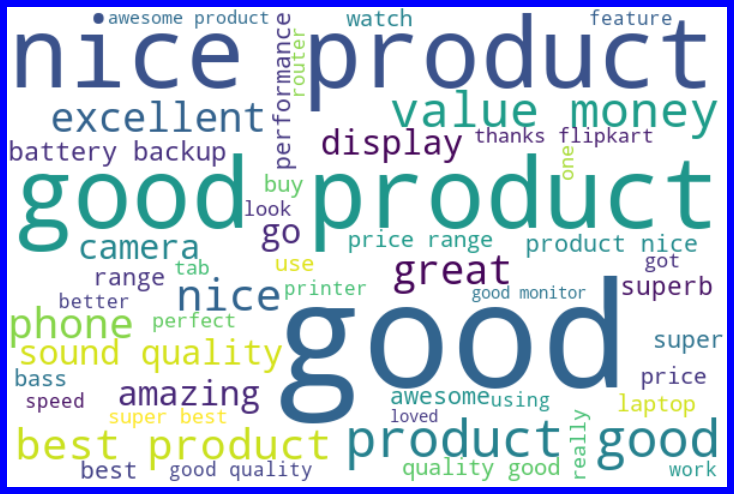

In [21]:
# Getting sense of loud words whose rating is 5
word = df['Cleaned_Full Reviews'][df['Ratings']==5]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Words appearing more frequently in Cleaned_Full Reviews column that is given rating five by consumers.

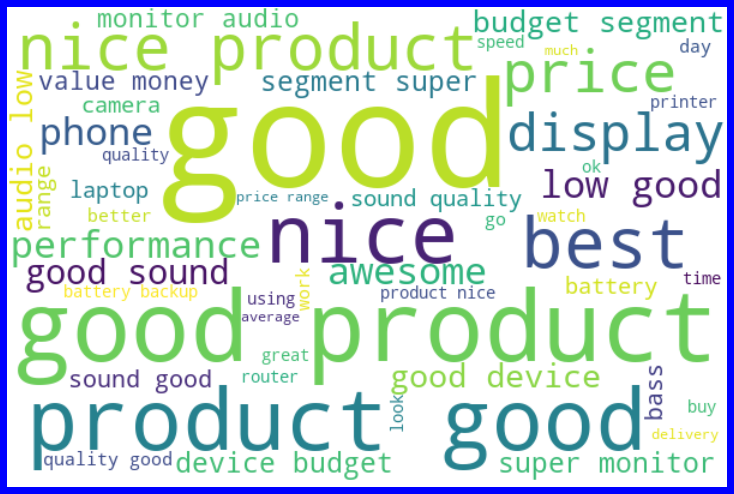

In [22]:
# Getting sense of loud words in Cleaned_Full Reviews column whose rating is 4
word = df['Cleaned_Full Reviews'][df['Ratings']==4]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Words appearing more frequently in Cleaned_Full Reviews column that is given rating four by consumers.

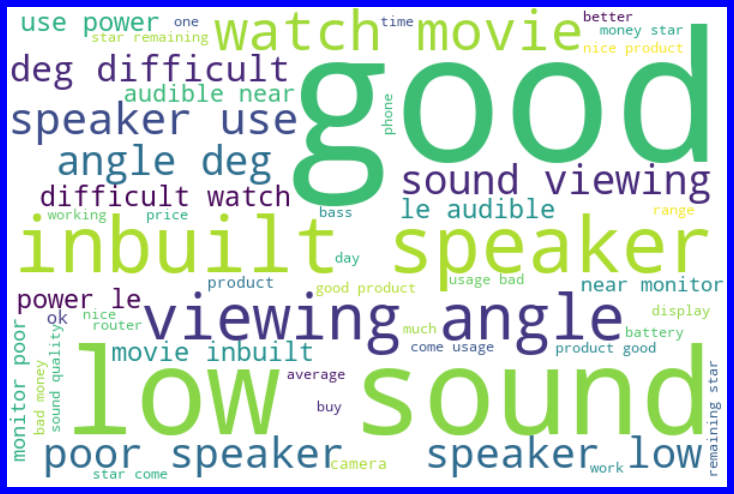

In [23]:
# Getting sense of loud words in Cleaned_Full Reviews column whose rating is 3
word = df['Cleaned_Full Reviews'][df['Ratings']==3]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Words appearing more frequently in Cleaned_Full Reviews column that is given rating three by consumers.

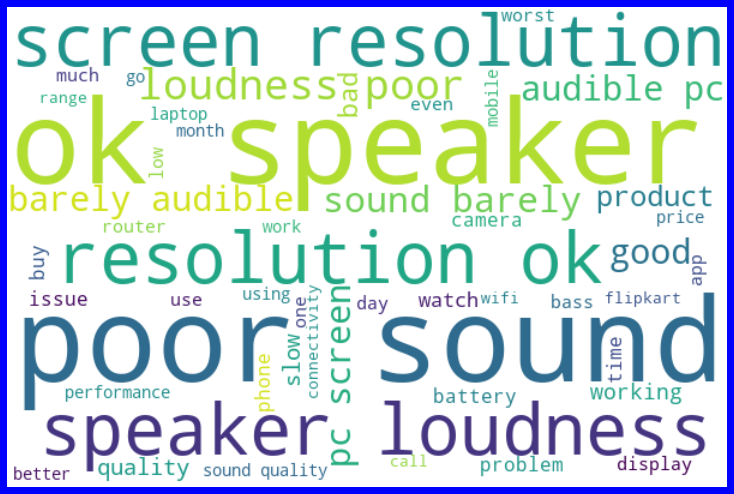

In [24]:
# Getting sense of loud words in Cleaned_Full Reviews column whose rating is 2
word = df['Cleaned_Full Reviews'][df['Ratings']==2]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Words appearing more frequently in Cleaned_Full Reviews column that is given rating two by consumers.

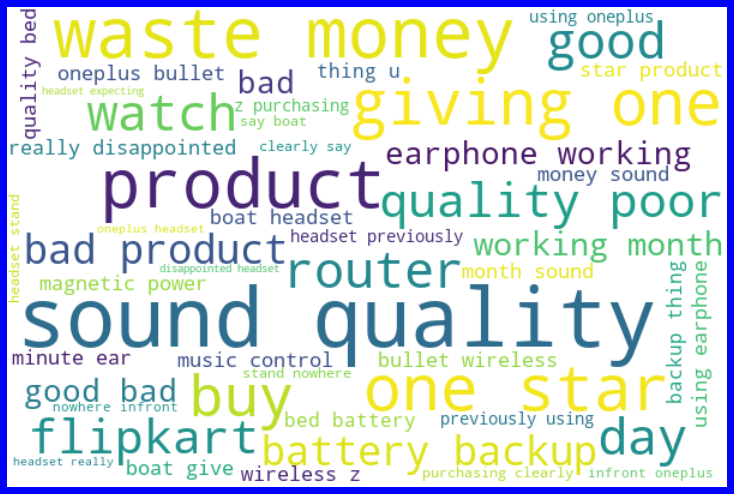

In [25]:
# Getting sense of loud words in Cleaned_Full Reviews column whose rating is 1
word = df['Cleaned_Full Reviews'][df['Ratings']==1]

# Creating word_cloud with word as argument in .generate() method
word_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(word))

plt.figure(figsize=(10,8),facecolor='b')

# Display the generated Word Cloud
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Words appearing more frequently in Cleaned_Full Reviews column that is given rating one by consumers.

In [26]:
# Convert Cleaned_Full Reviews texts into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(stop_words='english')

features = tf_vec.fit_transform(df['Cleaned_Full Reviews'])

In [27]:
X = features
y = df['Ratings']

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [29]:
# Here, we use SMOTE(resampling) method to cope up with imbalanced classification of target variable.
# SMOTE(Synthetic Minority Oversampling Technique) algorithm generates synthetic samples of minority class.
X_smote,y_smote = smote.fit_resample(X,y)
print(X.shape)
print(y.shape)

# check shape after oversampling  
print(X_smote.shape)
print(y_smote.shape)

(24557, 9261)
(24557,)
(67105, 9261)
(67105,)


In [30]:
# split data into train and test. Model will be build on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=51)

In [31]:
# Importing Classifier algorithms for model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

### Logistic Regression

In [32]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred = log_reg.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6823627585384753

In [35]:
### Cross Validation score to check if the model is overfitting
score= cross_val_score(log_reg,X_smote,y_smote,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.62983384 0.61046122 0.63624171 0.64555547 0.64943   ]
0.6343044482527382
0.013766675383203099


In [36]:
# Confusion Matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat

array([[2708,  312,  133,  126,   41],
       [ 477, 2473,  205,  123,   43],
       [ 195,  250, 2021,  490,  371],
       [ 111,   97,  335, 2072,  860],
       [  80,   89,  174,  817, 2174]], dtype=int64)

In [37]:
print('\n----------------Classification Report-------------------')
print (classification_report(y_test,y_pred,digits=2))


----------------Classification Report-------------------
              precision    recall  f1-score   support

           1       0.76      0.82      0.79      3320
           2       0.77      0.74      0.76      3321
           3       0.70      0.61      0.65      3327
           4       0.57      0.60      0.58      3475
           5       0.62      0.65      0.64      3334

    accuracy                           0.68     16777
   macro avg       0.68      0.68      0.68     16777
weighted avg       0.68      0.68      0.68     16777



### DecisionTree Classifier

In [38]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = dt_clf.predict(x_test)  
dt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 90.21%
______________________________________________
CLASSIFICATION REPORT:
                      1             2             3            4  \
precision      0.954949      0.988568      0.954802     0.792987   
recall         0.980002      0.941782      0.855954     0.875427   
f1-score       0.967313      0.964608      0.902680     0.832171   
support    10101.000000  10100.000000  10094.000000  9946.000000   

                      5  accuracy     macro avg  weighted avg  
precision      0.838134  0.902082      0.905888      0.906246  
recall         0.856746  0.902082      0.901982      0.902082  
f1-score       0.847338  0.902082      0.902822      0.903054  
support    10087.000000  0.902082  50328.000000  50328.000000  
______________________________________________
Confusion Matrix:
 [[9899   41   14  127   20]
 [ 289 9512  147  134   18]
 [  93   48 8640  746  567]
 [  44    9  122 8707 1064]
 [  41   12  

In [39]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_clf,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.71388123 0.71932047 0.74517547 0.74718724 0.73891662]
0.7328962074361076
0.01369035780821223


### Random Forest Classifier

In [40]:
rand_clf = RandomForestClassifier(random_state=51)
rand_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
rand_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = rand_clf.predict(x_test)  
rand_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 90.21%
______________________________________________
CLASSIFICATION REPORT:
                      1             2             3            4  \
precision      0.954949      0.988568      0.954802     0.792987   
recall         0.980002      0.941782      0.855954     0.875427   
f1-score       0.967313      0.964608      0.902680     0.832171   
support    10101.000000  10100.000000  10094.000000  9946.000000   

                      5  accuracy     macro avg  weighted avg  
precision      0.838134  0.902082      0.905888      0.906246  
recall         0.856746  0.902082      0.901982      0.902082  
f1-score       0.847338  0.902082      0.902822      0.903054  
support    10087.000000  0.902082  50328.000000  50328.000000  
______________________________________________
Confusion Matrix:
 [[9899   41   14  127   20]
 [ 289 9512  147  134   18]
 [  93   48 8640  746  567]
 [  44    9  122 8707 1064]
 [  41   12  

In [41]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_clf,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.78287758 0.7807913  0.79897176 0.81163848 0.80694434]
0.7962446911556516
0.012460939805639035


### KNN Classifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_train)
knn_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = knn.predict(x_test)  
knn_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 78.72%
______________________________________________
CLASSIFICATION REPORT:
                      1             2             3            4  \
precision      0.886584      0.871019      0.716652     0.730808   
recall         0.922483      0.920693      0.861700     0.727428   
f1-score       0.904177      0.895168      0.782511     0.729114   
support    10101.000000  10100.000000  10094.000000  9946.000000   

                      5  accuracy     macro avg  weighted avg  
precision      0.713582  0.787236      0.783729      0.783919  
recall         0.502627  0.787236      0.786986      0.787236  
f1-score       0.589809  0.787236      0.780156      0.780363  
support    10087.000000  0.787236  50328.000000  50328.000000  
______________________________________________
Confusion Matrix:
 [[9318  218  320  142  103]
 [ 248 9299  381  128   44]
 [ 146  190 8698  643  417]
 [ 182  245  813 7235 1471]
 [ 616  724 1

In [43]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.68139483 0.67312421 0.69406155 0.70911258 0.70263021]
0.6920646747634305
0.013257722754209765


### Support-Vector Machines

In [44]:
svc = SVC(kernel = 'rbf',C=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_train)
svc_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = svc.predict(x_test)  
svc_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 83.22%
______________________________________________
CLASSIFICATION REPORT:
                      1             2             3            4  \
precision      0.939075      0.901716      0.809897     0.734879   
recall         0.892684      0.879307      0.797702     0.748844   
f1-score       0.915292      0.890370      0.803753     0.741796   
support    10101.000000  10100.000000  10094.000000  9946.000000   

                      5  accuracy     macro avg  weighted avg  
precision      0.785463  0.832161      0.834206      0.834528  
recall         0.840983  0.832161      0.831904      0.832161  
f1-score       0.812276  0.832161      0.832697      0.832986  
support    10087.000000  0.832161  50328.000000  50328.000000  
______________________________________________
Confusion Matrix:
 [[9017  467  332  241   44]
 [ 369 8881  599  223   28]
 [ 109  316 8052  926  691]
 [  53  105  786 7448 1554]
 [  54   80  

In [45]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(svc,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.69018702 0.71775576 0.75165785 0.75806572 0.76134416]
0.7358021011847105
0.027589405373583432


### Gradient Boosting Classifier

In [46]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = gbdt_clf.predict(x_test)  
gbdt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 63.22%
______________________________________________
CLASSIFICATION REPORT:
                      1             2             3            4  \
precision      0.705410      0.607901      0.711827     0.525089   
recall         0.765469      0.671881      0.508025     0.563945   
f1-score       0.734213      0.638292      0.592901     0.543824   
support    10101.000000  10100.000000  10094.000000  9946.000000   

                      5  accuracy     macro avg  weighted avg  
precision      0.636073  0.632213      0.637260      0.637596  
recall         0.650639  0.632213      0.631992      0.632213  
f1-score       0.643274  0.632213      0.630501      0.630769  
support    10087.000000  0.632213  50328.000000  50328.000000  
______________________________________________
Confusion Matrix:
 [[7732 1551  299  411  108]
 [1913 6786  692  558  151]
 [ 659 1366 5128 1853 1088]
 [ 317  804  808 5609 2408]
 [ 340  656  

In [47]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbdt_clf,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.56784144 0.58110424 0.59235526 0.59943372 0.59473959]
0.5870948513523583
0.011357313678651757


### Stochastic Gradient Descent

In [48]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6986350360612744

In [49]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(sgd,X_smote,y_smote,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.64816333 0.62975933 0.65308099 0.64741823 0.66924968]
0.6495343118992623
0.012638687063714241


In [50]:
accuracy =[68.23,74.90,82.38,71.79,78.04,61.06,69.86]
cross_val_score=[63.43,73.28,79.62,69.20,73.58,58.70,64.95]

model=['Logistic Regression','Decision Tree','Random Forest','KNN','SVM','Gradient','Stochastic']
best_model=pd.DataFrame({'Model':model,'Accuracy':accuracy,'Cross validation score':cross_val_score})
best_model

,Model,Accuracy,Cross validation score
0,Logistic Regression,68.23,63.43
1,Decision Tree,74.90,73.28
2,Random Forest,82.38,79.62
3,KNN,71.79,69.20
4,SVM,78.04,73.58
5,Gradient,61.06,58.70
6,Stochastic,69.86,64.95


#### DecisionTree Classifier model is our best model because the difference between its accuracy and CV score is least than other models.

### Using GridSearchCV for hyper parameter tuning on best model (DecisionTree)

In [53]:
grid_param = {'criterion':['gini','entropy'],'max_depth':[15,20,30,40,50,70,90,120,150,180,210,240,270,300,330]}

In [54]:
grid_search = GridSearchCV(estimator=dt_clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [55]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 30, 40, 50, 70, 90, 120, 150,
                                       180, 210, 240, 270, 300, 330]})

In [56]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 330}


In [58]:
dt_clf = DecisionTreeClassifier(criterion ='gini', max_depth= 330)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=330)

In [59]:
dt_clf.score(x_test,y_test)

0.7478691065148716

In [60]:
# After applying hyper parameter tuning accuracy is approximately same.

### Model Saving

In [61]:
# saving the model to local system
filename = 'Ratings Prediction_model.pickle'
pickle.dump(dt_clf,open(filename,'wb'))

In [62]:
# Model has been saved successfully.